In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# DATA CLEANING

In [108]:
fire = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [109]:
fire.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    
0  not fire     
1  not fire     
2  not fire     
3  not fire     
4  not fire

In [111]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [112]:
fire.describe()

day month  year Temperature   RH   Ws Rain   FFMC  DMC   DC  ISI  BUI  \
count   246   245   245         245  245  245   245   245  245  245  245  245   
unique   33     5     2          20   63   19    40   174  167  199  107  175   
top      01    07  2012          35   64   14     0  88.9  7.9    8  1.1    3   
freq      8    62   244          29   10   43   133     8    5    5    8    5   

        FWI Classes    
count   245       244  
unique  128         9  
top     0.4   fire     
freq     12       131

In [113]:
fire[fire['Classes  '].isnull()==True]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [114]:
fire.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [115]:
fire[fire.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [116]:
fire.loc[0:121,"Region"]=0
fire.loc[122:246,"Region"]=1
df = fire

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [119]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire        0.0  
1  not fire        0.0  
2  not fire        0.0  
3  not fire        0.0  
4  not fire        0.0

In [120]:
df['Region'] = df['Region'].astype(int)
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [121]:
df.iloc[119:125]

day  month  year  Temperature   RH   Ws  Rain   \
119                             28     09  2012           32   47   14    0.7   
120                             29     09  2012           26   80   16    1.8   
121                             30     09  2012           25   78   14    1.4   
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    
124                             01     06  2012           32   71   12    0.7   

     FFMC  DMC   DC  ISI  BUI  FWI    Classes    Region  
119  77.5  7.1  8.8  1.8  6.8  0.9  not fire          0  
120  47.4  2.9  7.7  0.3    3  0.1  not fire          0  
121    45  1.9  7.5  0.2  2.4  0.1  not fire          0  
122   NaN  NaN  NaN  NaN  NaN  NaN          NaN       1  
123  FFMC  DMC   DC  ISI  BUI  FWI    Classes         1  
124  57.1  2.5  8.2  0.6  2.8  0.2  not fire          1

In [122]:
df.drop(index=[122,123],axis=0,inplace=True)
df.iloc[119:125]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
119  28    09  2012          32  47  14   0.7  77.5  7.1  8.8  1.8  6.8  0.9   
120  29    09  2012          26  80  16   1.8  47.4  2.9  7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9  7.5  0.2  2.4  0.1   
124  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   
125  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6  2.9  0.2   
126  03    06  2012          29  80  14     2  48.7  2.2  7.6  0.3  2.6  0.1   

       Classes    Region  
119  not fire          0  
120  not fire          0  
121  not fire          0  
124  not fire          1  
125  not fire          1  
126  not fire          1

In [123]:
df.reset_index(drop=True,inplace=True)
df.iloc[119:125]

day month  year Temperature  RH  Ws Rain   FFMC  DMC   DC  ISI  BUI  FWI  \
119  28    09  2012          32  47  14   0.7  77.5  7.1  8.8  1.8  6.8  0.9   
120  29    09  2012          26  80  16   1.8  47.4  2.9  7.7  0.3    3  0.1   
121  30    09  2012          25  78  14   1.4    45  1.9  7.5  0.2  2.4  0.1   
122  01    06  2012          32  71  12   0.7  57.1  2.5  8.2  0.6  2.8  0.2   
123  02    06  2012          30  73  13     4  55.7  2.7  7.8  0.6  2.9  0.2   
124  03    06  2012          29  80  14     2  48.7  2.2  7.6  0.3  2.6  0.1   

       Classes    Region  
119  not fire          0  
120  not fire          0  
121  not fire          0  
122  not fire          1  
123  not fire          1  
124  not fire          1

In [127]:
df.head()

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

     Classes    Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [129]:
df[df.isnull().any(axis=1)]

day month  year Temperature  RH  Ws Rain   FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18   0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes    Region  
165  fire          NaN       1

In [130]:
df.dropna(inplace=True)

In [131]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  , Region]
Index: []

In [132]:
df.shape

(243, 15)

In [133]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [135]:
df.columns = df.columns.str.strip()

In [136]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [137]:
df.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

       Classes  Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [142]:
df_copy = df.copy()

In [143]:
df_copy.head()

day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  \
0  01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1  02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2  03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3  04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4  05    06  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   

       Classes  Region  
0  not fire          0  
1  not fire          0  
2  not fire          0  
3  not fire          0  
4  not fire          0

In [144]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.4+ KB


In [147]:
# Just trying this code on a copy of df i.e. df_copy

In [145]:
for i in df_copy:
    if i == 'day' or i=='month' or i=='year' or i=='Temperature' or i=='RH' or i=='Ws':
        df_copy[i]=df_copy[i].astype(int)
    else:
        if i!='Classes':
            df_copy[i]=df_copy[i].astype(float)
        else:
            continue

In [148]:
df_copy.info()                        # IT WORKED !!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 30.4+ KB


In [157]:
df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 30.4+ KB


In [160]:
for i in df:
    if df[i].dtypes == 'O' and i!='Classes':
        df[i]=df[i].astype(float)
df.info()                            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [175]:
# Save the cleaned data into other csv
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index = False)

In [208]:
df_cleaned = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [209]:
df_cleaned.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0

# EXPLORATORY DATA ANALYSIS

In [177]:
df_copy = df.copy()

In [178]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 30.4+ KB


In [179]:
df_copy.drop(['day','month','year'],inplace=True,axis=1)

In [181]:
df_copy.head(3)

Temperature  RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4  7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1  7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5  7.1  0.3  2.7  0.1  not fire      

   Region  
0       0  
1       0  
2       0

In [192]:
df_copy['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [195]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [188]:
df_copy[df_copy['Classes'].str.contains('not fire')]

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
238           28  70  15   0.0  79.9  13.8  36.1  2.4  14.1  3.0   
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
243           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

          Classes  Region  
0     not fire          0  
1     not fire          0  
2     not fire          0  
3     not fire          0  
4     not fire          0  
..            ...     ...  
238   not fire          1  
240   not fire          1  
241   not fire          1  
242   not fire          1  
243  not fire           1  

[106 rows x 12 columns]

In [196]:
df_copy[df_copy['Classes']=='not fire   ']

Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI      Classes  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5  not fire      
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4  not fire      
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1  not fire      
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0  not fire      
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5  not fire      
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...          ...   
237           26  49   6   2.0  61.3  11.9  28.1  0.6  11.9  0.4  not fire      
238           28  70  15   0.0  79.9  13.8  36.1  2.4  14.1  3.0  not fire      
240           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0  not fire      
241           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2  not fire      
242           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7  not fire      

     Region  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
237       1  
238       1  
240       1  
241       1  
242       1  

[101 rows x 12 columns]

In [210]:
df_copy['Classes'].str.strip().value_counts()                #### This is another way of fixing the diff gaps in data 
                                                        #### with same names but diff gaps

fire        137
not fire    106
Name: Classes, dtype: int64

In [211]:
df_copy['Classes'] = df_copy['Classes'].str.strip()
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [212]:
df_copy['Classes'] = df_copy['Classes'].str.strip().map({'not fire':0,'fire':1})  #### Another way of coding the classification
df_copy['Classes'].unique()

array([0, 1])

In [213]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

In [223]:
df_copy_2 = df_cleaned.copy()

In [224]:
df_copy_2.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0

In [226]:
df_copy_2['Classes'] = np.where(df_copy_2['Classes'].str.contains('not fire'),0,1)

In [227]:
df_copy_2.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        0       0  
1  0.4        0       0  
2  0.1        0       0  
3  0.0        0       0  
4  0.5        0       0

In [229]:
df_copy_2['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [230]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 24.7 KB


In [268]:
df_copy.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

# Splitting into Independent and Dependent Variables

In [277]:
df_copy.drop('FWI',axis=1,inplace=True)

In [283]:
df_copy.head(3)

Temperature  RH  Ws  Rain  FFMC  DMC   DC  ISI  BUI  Classes  Region
0           29  57  18   0.0  65.7  3.4  7.6  1.3  3.4        0       0
1           29  61  13   1.3  64.4  4.1  7.6  1.0  3.9        0       0
2           26  82  22  13.1  47.1  2.5  7.1  0.3  2.7        0       0

In [284]:
x = df_copy[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','Classes','Region']]

In [285]:
y = df['FWI']

In [286]:
x.shape,y.shape

((243, 11), (243,))

# Split into Train and Test

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [296]:
x_train,x_test,y_train,y_test

(     Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  Classes  Region
 97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6        0       0
 141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7        0       1
 193           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4        1       1
 68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1        0       0
 119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8        0       0
 ..           ...  ..  ..   ...   ...   ...   ...   ...   ...      ...     ...
 106           24  82  15   0.4  44.9   0.9   7.3   0.2   1.4        0       0
 14            28  80  17   3.1  49.4   3.0   7.4   0.4   3.0        0       0
 92            25  76  17   7.2  46.0   1.3   7.5   0.2   1.8        0       0
 180           34  59  16   0.0  88.1  19.5  47.2   7.4  19.5        1       1
 102           30  77  21   1.8  58.5   1.9   8.4   1.1   2.4        0       0
 
 [182 rows x 11 columns],
      Temperature  RH  W

In [297]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

# Standardization

In [290]:
#from sklearn.preprocessing import StandardScaler

In [291]:
#scaler = StandardScaler()

In [298]:
#x_train_scaled = scaler.fit_transform(x_train)

In [300]:
#x_test_scaled = scaler.transform(x_test)

In [325]:
#x_train_scaled.mean()

In [324]:
#x_test_scaled.mean()

In [323]:
#x_train_scaled.shape,x_test_scaled.shape

# Feature Selection

In [307]:
x_train.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes    Region  
Temperature  0.390684  0.629848  0.473609  0.542141  0.254549  
RH          -0.236078 -0.717804 -0.362317 -0.456876 -0.394665  
Ws           0.096576 -0.023558  0.035633 -0.082570 -0.199969  
Rain        -0.302341 -0.345707 -0.300964 -0.369357 -0.059022  
FFMC         0.524101  0.750799  0.607210  0.781259  0.249514  
DMC          0.868647  0.685656  0.983175  0.617273  0.212582  
DC           1.000000  0.513701  0.942414  0.543581 -0.060838  
ISI          0.513701  1.000000  0.643818  0.742977  0.296441  
BUI          0.942414  0.643818  1.000000  0.612239  0.114897  
Classes      0.543581  0.742977  0.612239  1.000000  0.188837  
Region      -0.060838  0.296441  0.114897  0.188837  1.000000

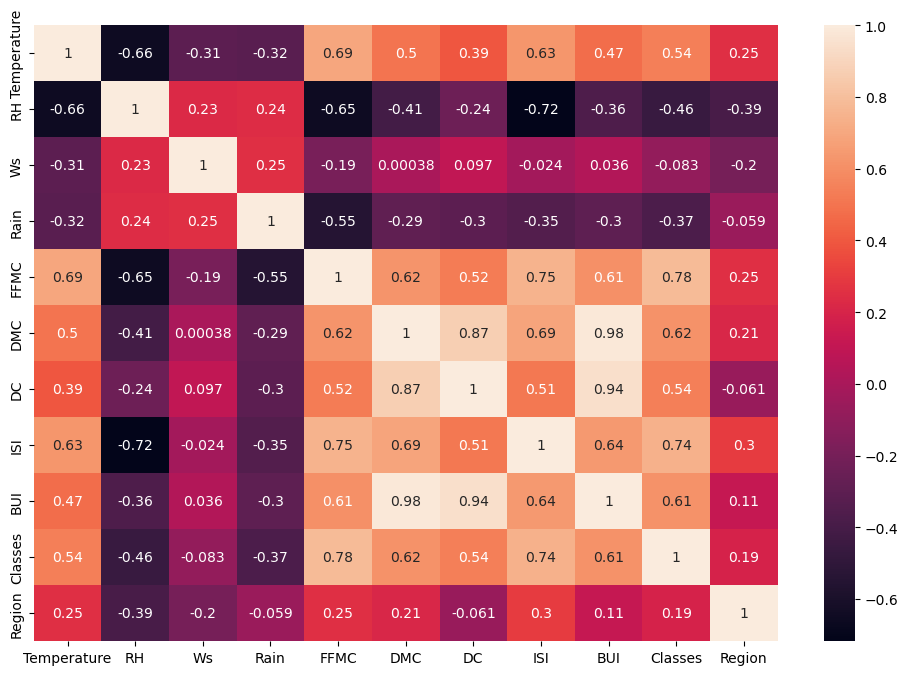

In [309]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train.corr(),annot=True)
plt.show()

In [310]:
def feature_sel(data,threshold):
    col = set()
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if (data.corr().iloc[i,j])>threshold:
                col.add(data.corr().columns[i])
    return col           

In [312]:
columns = feature_sel(x_train,0.85)
columns

{'BUI', 'DC'}

In [313]:
x_train.drop(columns,axis=1,inplace=True)
x_test.drop(columns,axis=1,inplace=True)

In [317]:
x_train.head(),x_test.head()

(     Temperature  RH  Ws  Rain  FFMC   DMC   ISI  Classes  Region
 97            29  74  19   0.1  75.8   3.6   2.1        0       0
 141           31  72  14   0.2  60.2   3.8   0.8        0       1
 193           40  31  15   0.0  94.2  22.5  16.6        1       1
 68            32  60  18   0.3  77.1  11.3   2.2        0       0
 119           32  47  14   0.7  77.5   7.1   1.8        0       0,
      Temperature  RH  Ws  Rain  FFMC   DMC  ISI  Classes  Region
 24            31  64  15   0.0  86.7  14.2  5.7        1       0
 6             33  54  13   0.0  88.2   9.9  6.4        1       0
 152           28  58  18   2.2  63.7   3.2  1.2        0       1
 233           34  58  13   0.2  79.5  18.7  2.1        0       1
 239           30  65  14   0.0  85.4  16.0  4.5        1       1)

# Standardization or Feature Scaling

In [318]:
from sklearn.preprocessing import StandardScaler

In [319]:
scaler = StandardScaler()

In [321]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [326]:
x_train_scaled.shape,x_test_scaled.shape

((182, 9), (61, 9))

# Linear Regression with Errors and R2 score

In [327]:
from sklearn.linear_model import LinearRegression

In [328]:
regressor = LinearRegression()

In [329]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [330]:
regressor.intercept_

7.156043956043957

In [356]:
regressor.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

In [357]:
y_pred = regressor.predict(x_test_scaled)

In [358]:
y_test,y_pred

(24      8.4
 6       7.2
 152     0.5
 233     3.8
 239     6.5
        ... 
 162     0.8
 179     9.0
 225     3.9
 231    15.4
 154     5.2
 Name: FWI, Length: 61, dtype: float64,
 array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
         6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
         1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
         9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
         1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
         1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
         2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
        -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
         1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
         2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
         6.68439528e+00,  1.79727675e+00,  8.59237254e+00

In [334]:
# Errors

In [335]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [370]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.5468236465249987

In [371]:
mse = mean_squared_error(y_test,y_pred)
mse

0.6742766873791599

In [372]:
rmse = np.sqrt(mse)
rmse

0.8211435242265264

In [363]:
# R2 Score

In [341]:
from sklearn.metrics import r2_score

In [364]:
score = r2_score(y_test,y_pred)
score

0.9847657384266951

In [365]:
print('ACCURACY OF THE MODEL IS',(score*100).round(2),'%')

ACCURACY OF THE MODEL IS 98.48 %


# Ridge Regression with Errors and R2 score

In [346]:
from sklearn.linear_model import Ridge

In [347]:
ridge = Ridge()

In [348]:
ridge.fit(x_train_scaled,y_train)

Ridge()

In [349]:
ridge.intercept_,ridge.coef_

(7.156043956043957,
 array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
         3.68286744,  4.74488835,  0.43423672, -0.38466214]))

In [366]:
y_pred_ridge = ridge.predict(x_test_scaled)

In [367]:
y_pred_ridge,y_test

(array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
         1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
         0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
         1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
         1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
         5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
         6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
         0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
         6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
         8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
        29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
        16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
         5.27050843]),
 24      8.4
 6       7.2
 152     0.5
 233     3.8
 239     6.5
        ... 
 162     0.8
 179     9

In [353]:
# ERRORS

In [354]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [373]:
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mae_ridge

0.5642305340105693

In [374]:
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mse_ridge

0.6949198918152067

In [375]:
rmse = np.sqrt(mse_ridge)
rmse

0.8336185529456543

In [376]:
# R2 SCORE

In [378]:
from sklearn.metrics import r2_score

In [379]:
score_ridge = r2_score(y_test,y_pred)
score_ridge

0.9847657384266951

In [380]:
print('ACCURACY OF THE MODEL IS',(score_ridge*100).round(2),'%')

ACCURACY OF THE MODEL IS 98.48 %


# LASSO REGRESSION

In [381]:
from sklearn.linear_model import Lasso

In [382]:
lasso = Lasso()

In [383]:
lasso.fit(x_train_scaled,y_train)

Lasso()

In [384]:
lasso.intercept_,lasso.coef_

(7.156043956043957,
 array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
         2.99025157,  4.00824747,  0.        , -0.        ]))

In [386]:
y_pred_lasso = lasso.predict(x_test_scaled)
y_pred_lasso

array([ 7.84570511,  7.4760351 ,  1.06280248,  5.57182566,  7.15885302,
        2.98472993,  3.29585571,  7.88757659,  2.64885633,  3.93029159,
        1.49954269,  9.90939713,  9.38584995, 15.7567602 , 16.31754696,
        2.94285845,  2.56817739, -0.40623463,  7.0973165 ,  4.05837568,
        2.78651163,  0.83183302,  6.46086185,  0.80409291, 19.21068568,
        5.76645732,  5.86530516,  9.16901185, -0.64326039,  9.83769504,
        6.56628861,  1.06684001,  9.62691324, 13.06176805,  2.57722597,
        2.28322385,  2.59487225,  6.44426082,  0.37191286,  0.3915779 ,
        6.32171041,  2.93276462,  8.11248975, -0.54845009, 14.49798226,
        7.96825553,  8.55326749,  2.03662688, 12.4409409 ,  1.88633635,
       25.87619242,  6.07660958, 15.93875663, 17.14160346, 12.52311598,
       14.3603987 ,  2.35836911,  9.12915914,  4.68421388, 13.65732474,
        5.85117379])

In [387]:
# ERRORS

In [388]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [389]:
mae_lasso = mean_absolute_error(y_test,y_pred_ridge)
mae_lasso

0.5642305340105693

In [391]:
mse_lasso = mean_squared_error(y_test,y_pred_ridge)
mse_lasso

0.6949198918152067

In [393]:
rmse = np.sqrt(mse_lasso)
rmse

0.8336185529456543

In [394]:
# R2 SCORE

In [395]:
from sklearn.metrics import r2_score

In [396]:
score_lasso = r2_score(y_test,y_pred_lasso)
score_lasso

0.9492020263112388

In [397]:
print('ACCURACY OF THE MODEL IS',(score_lasso*100).round(2),'%')

ACCURACY OF THE MODEL IS 94.92 %


# ELASTICNET REGRESSION

In [398]:
from sklearn.linear_model import ElasticNet

In [399]:
elastic = ElasticNet()

In [400]:
elastic.fit(x_train_scaled,y_train)

ElasticNet()

In [401]:
elastic.intercept_,elastic.coef_

(7.156043956043956,
 array([ 0.21700498, -0.46785751,  0.        , -0.        ,  0.37217213,
         2.36758116,  2.35779601,  0.87026661,  0.        ]))

In [402]:
y_pred_elastic = elastic.predict(x_test_scaled)
y_pred_elastic

array([ 8.440192  ,  8.48416748,  1.58398174,  5.74704744,  7.99925012,
        3.84543773,  4.65423145,  9.85746701,  2.41164568,  4.42033198,
        1.69311557,  9.29479476,  9.94989153, 14.80040551, 14.99184886,
        3.85114187,  2.99061658, -0.97985369,  7.64927581,  6.40186267,
        2.76037744,  0.786395  ,  7.65023687,  1.04550366, 17.05166573,
        8.10156058,  7.10480686,  9.72405017, -1.63030854,  9.98040215,
        6.77739365,  1.80475174,  9.66423333, 12.61018368,  3.22848878,
        2.95760651,  4.2159643 ,  8.47055095, -0.0452998 , -0.22390909,
        8.07425176,  3.59582409,  9.01788865, -1.00255442, 13.98138726,
        8.47227471,  8.66221408,  2.37166362, 12.20709739,  2.13892487,
       22.42259827,  8.36459938, 14.18257366, 15.41045041, 12.03375106,
       13.32632753,  3.23749418,  9.62446446,  5.98090909, 13.781952  ,
        7.4239577 ])

In [403]:
# ERRORS

In [404]:
mae_elastic = mean_absolute_error(y_test,y_pred_elastic)
mae_elastic

1.8822353634896

In [405]:
mse_elastic = mean_squared_error(y_test,y_pred_elastic)
mse_elastic

5.517251101025224

In [406]:
rmse = np.sqrt(mse_elastic)
rmse

2.3488829474933874

In [407]:
# R2 SCORE

In [408]:
score_elastic = r2_score(y_test,y_pred_elastic)
score_elastic

0.8753460589519703

In [409]:
print('ACCURACY OF THE MODEL IS',(score_elastic*100).round(2),'%')

ACCURACY OF THE MODEL IS 87.53 %


# Pickle File Creation

In [431]:
import pickle

In [437]:
pickle.dump(scaler,open('scale.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [438]:
# FOR practice

In [413]:
import sweetviz as sv
report = sv.analyze(fire)
report.show_html('fire.html')

                                             |      | [  0%]   00:00 -> (? left)

Report fire.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:>

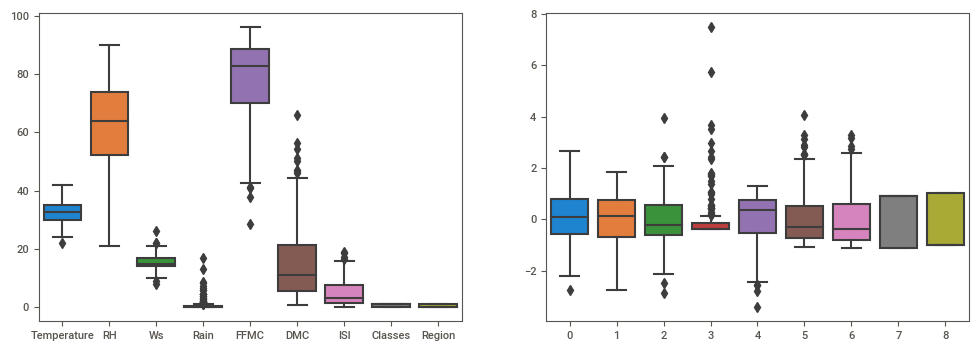

In [439]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)